# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [22]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [23]:
# for index, city in enumerate(cities):

#     base_url = "http://api.openweathermap.org/data/2.5/weather?"

#     weather_url = f'{base_url}q={city}&appid={weather_api_key}'
#     response = requests.get(weather_url).json()
# #     pprint(response)

In [83]:
cities_df = pd.DataFrame({"city_name": [],
                        "latitude": [],
                        "longitude": [],
                        "max temp": [],
                        "humidity": [],
                        "cloudiness": [],
                        "wind speed": [],
                        "country": [],
                        "date": []})

for index, city in enumerate(cities):
    
    base_url = "http://api.openweathermap.org/data/2.5/weather?"

    weather_url = f'{base_url}q={city}&units=imperial&appid={weather_api_key}'
    response = requests.get(weather_url).json()

    try:
        print(f"Processing Record {index} | {city}.")
        cities_df.loc[index, 'city_name'] = response['name']
        cities_df.loc[index, 'latitude'] = response['coord']['lat']
        cities_df.loc[index, 'longitude'] = response['coord']['lon']
        cities_df.loc[index, 'max temp'] = response['main']['temp_max']
        cities_df.loc[index, 'humidity'] = response['main']['humidity']
        cities_df.loc[index, 'cloudiness'] = response['clouds']['all']
        cities_df.loc[index, 'wind speed'] = response['wind']['speed']
        cities_df.loc[index, 'country'] = response['sys']['country']
        cities_df.loc[index, 'date'] = response['dt']

    except (KeyError, NameError):
        print("City not found. Skipping...")

Processing Record 0 | rikitea.
Processing Record 1 | atuona.
Processing Record 2 | hayden.
Processing Record 3 | busselton.
Processing Record 4 | tigil.
Processing Record 5 | jamestown.
Processing Record 6 | riyadh.
Processing Record 7 | cape town.
Processing Record 8 | touros.
Processing Record 9 | kavieng.
Processing Record 10 | illoqqortoormiut.
City not found. Skipping...
Processing Record 11 | carnarvon.
Processing Record 12 | port lincoln.
Processing Record 13 | solwezi.
Processing Record 14 | awbari.
Processing Record 15 | abilene.
Processing Record 16 | beyneu.
Processing Record 17 | hami.
Processing Record 18 | bambous virieux.
Processing Record 19 | guerrero negro.
Processing Record 20 | san carlos de bariloche.
Processing Record 21 | bengkulu.
Processing Record 22 | kahului.
Processing Record 23 | assiniboia.
Processing Record 24 | paamiut.
Processing Record 25 | skjaerhollen.
City not found. Skipping...
Processing Record 26 | upernavik.
Processing Record 27 | hilo.
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [84]:
cities_df.head()

,city_name,latitude,longitude,max temp,humidity,cloudiness,wind speed,country,date
0,Rikitea,-23.1203,-134.9692,79.20,74.0,5.0,21.18,PF,1.616820e+09
1,Atuona,-9.8000,-139.0333,80.91,77.0,56.0,18.57,PF,1.616820e+09
2,Hayden,47.7660,-116.7866,46.40,61.0,90.0,6.91,US,1.616820e+09
3,Busselton,-33.6500,115.3333,75.00,53.0,20.0,3.00,AU,1.616820e+09
4,Tigil',57.8000,158.6667,19.47,80.0,90.0,11.88,RU,1.616820e+09


In [85]:
cities_df.to_csv("city_weather.csv")
cities_df

,city_name,latitude,longitude,max temp,humidity,cloudiness,wind speed,country,date
0,Rikitea,-23.1203,-134.9692,79.20,74.0,5.0,21.18,PF,1.616820e+09
1,Atuona,-9.8000,-139.0333,80.91,77.0,56.0,18.57,PF,1.616820e+09
2,Hayden,47.7660,-116.7866,46.40,61.0,90.0,6.91,US,1.616820e+09
3,Busselton,-33.6500,115.3333,75.00,53.0,20.0,3.00,AU,1.616820e+09
4,Tigil',57.8000,158.6667,19.47,80.0,90.0,11.88,RU,1.616820e+09
...,...,...,...,...,...,...,...,...,...
625,Paciran,-6.8767,112.3761,84.88,71.0,100.0,3.65,ID,1.616820e+09
626,Palmares do Sul,-30.2578,-50.5097,70.83,89.0,100.0,7.61,BR,1.616820e+09
627,Juba,4.8517,31.5825,75.47,64.0,97.0,4.59,SS,1.616820e+09
628,Santa Fe,-31.6333,-60.7000,57.06,82.0,9.0,10.69,AR,1.616820e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [86]:
high_humidity = cities_df.loc[cities_df["humidity"] > 100.0]
high_humidity

,city_name,latitude,longitude,max temp,humidity,cloudiness,wind speed,country,date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

''

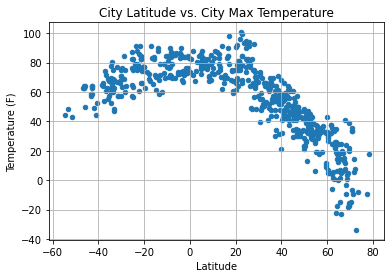

In [93]:
cities_df.plot.scatter('latitude', 'max temp')
plt.title("City Latitude vs. City Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(axis="both")
plt.savefig("../Images/latitude_vs_temp.png")
;

## Latitude vs. Humidity Plot

''

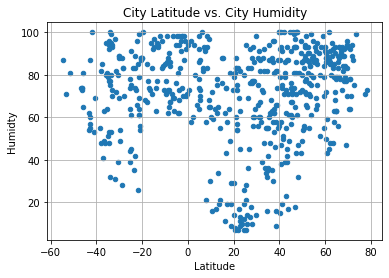

In [89]:
cities_df.plot.scatter('latitude', 'humidity')
plt.title("City Latitude vs. City Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidty")
plt.grid(axis="both")
plt.savefig("../Images/latitude_vs_humidity.png")
;

## Latitude vs. Cloudiness Plot

''

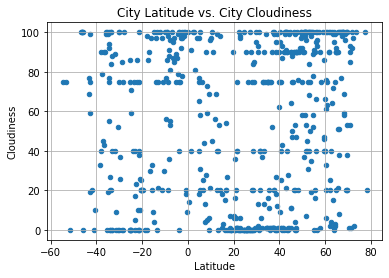

In [90]:
cities_df.plot.scatter('latitude', 'cloudiness')
plt.title("City Latitude vs. City Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(axis="both")
plt.savefig("../Images/latitude_vs_cloudiness.png")
;

## Latitude vs. Wind Speed Plot

''

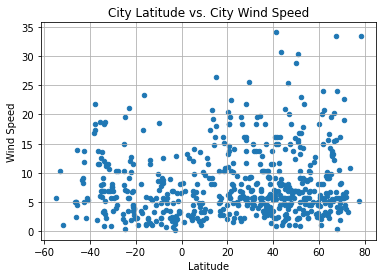

In [91]:
cities_df.plot.scatter('latitude', 'wind speed')
plt.title("City Latitude vs. City Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(axis="both")
plt.savefig("../Images/latitude_vs_windspeed.png")
;

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression